In [1]:
#importing required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [3]:
#Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 77s 0us/step


In [5]:
#Normalise the pixel values(0-255) to (0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


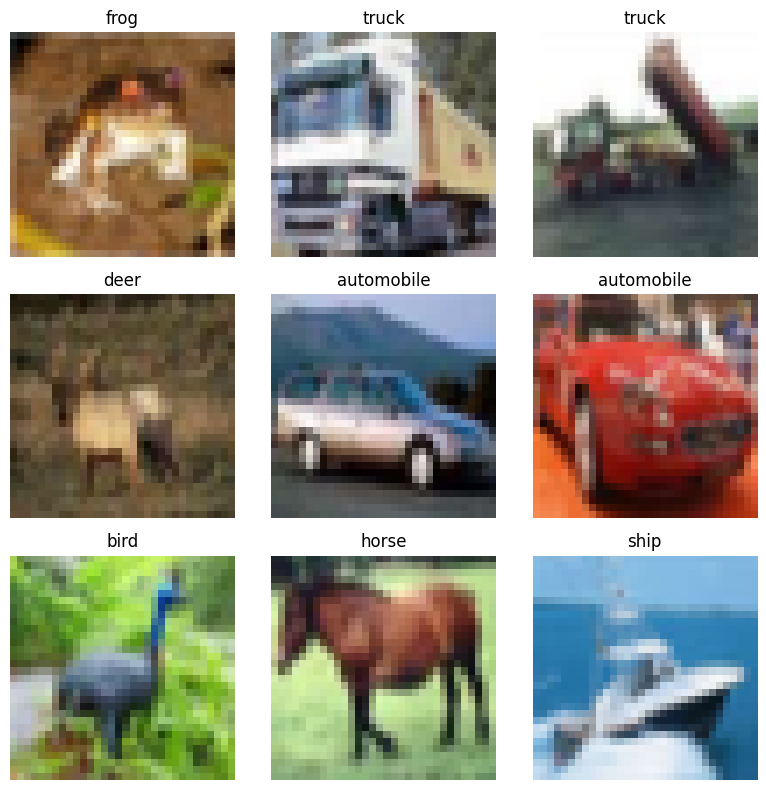

In [9]:
#visualise sample images
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [11]:
#Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

C:\Users\junai\anaconda3\envs\machinelearning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [15]:
#train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.3361 - loss: 1.7921 - val_accuracy: 0.5644 - val_loss: 1.2200
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5817 - loss: 1.1857 - val_accuracy: 0.6324 - val_loss: 1.0430
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.6466 - loss: 1.0001 - val_accuracy: 0.6441 - val_loss: 1.0230
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.6799 - loss: 0.9059 - val_accuracy: 0.6453 - val_loss: 1.0123
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7095 - loss: 0.8254 - val_accuracy: 0.6858 - val_loss: 0.9076
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7274 - loss: 0.7670 - val_accuracy: 0.6949 - val_loss: 0.8777
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.7498 - loss: 0.7190 - val_accuracy: 0.7061 - val_loss: 0.8732
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7622 -

In [17]:
#evaluate the model performance
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

313/313 - 3s - 11ms/step - accuracy: 0.7038 - loss: 0.8780

Test Accuracy: 70.38%


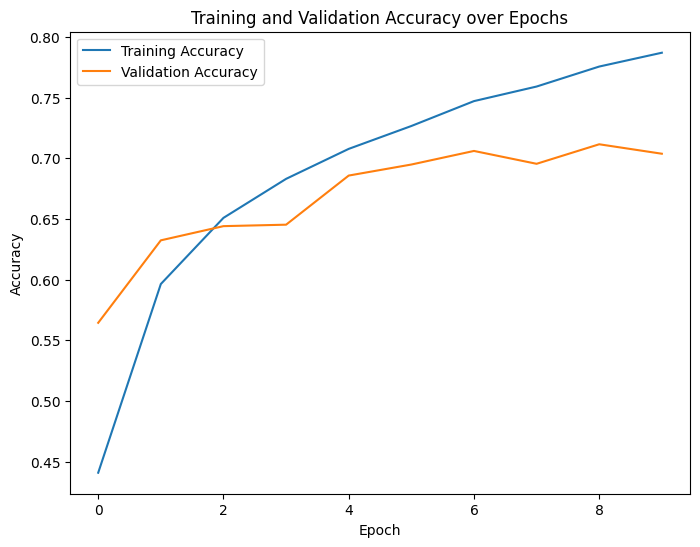

In [19]:
#Plot training vs Validation accuracy
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


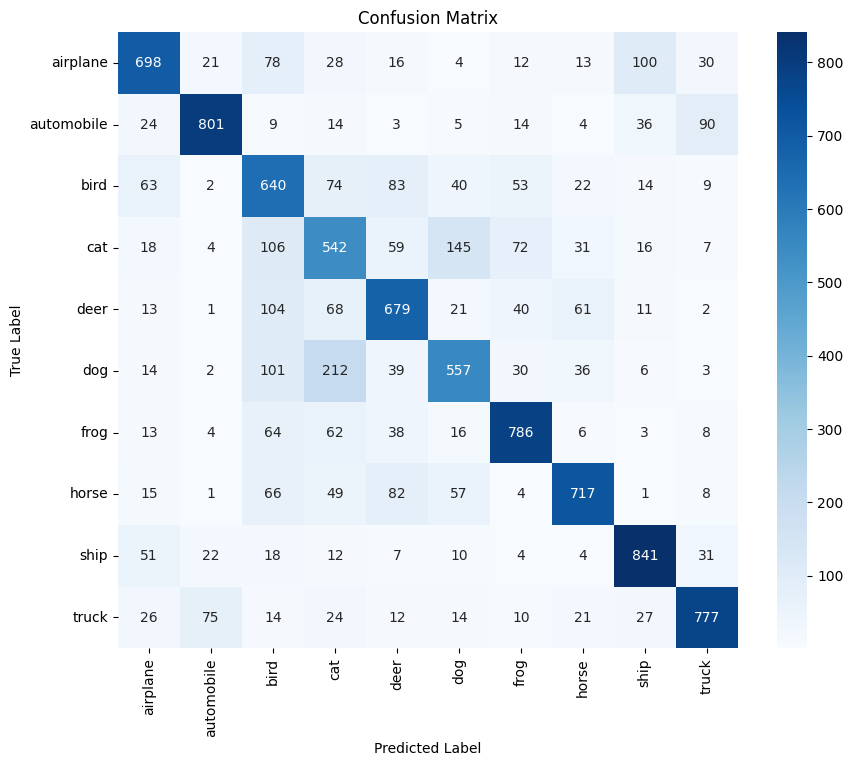

In [21]:
#confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_flat = y_test.flatten()

cm = confusion_matrix(y_test_flat, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [23]:
#classification report
print("\nClassification Report:\n")
print(classification_report(y_test_flat, y_pred_classes, target_names=class_names))


Classification Report:

              precision    recall  f1-score   support

    airplane       0.75      0.70      0.72      1000
  automobile       0.86      0.80      0.83      1000
        bird       0.53      0.64      0.58      1000
         cat       0.50      0.54      0.52      1000
        deer       0.67      0.68      0.67      1000
         dog       0.64      0.56      0.60      1000
        frog       0.77      0.79      0.78      1000
       horse       0.78      0.72      0.75      1000
        ship       0.80      0.84      0.82      1000
       truck       0.81      0.78      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.71     10000
weighted avg       0.71      0.70      0.71     10000

